In [2]:
# Cartpole setup
import gymnasium as gym
import numpy as np
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.decorators import add_to
import seaborn as sns
import matplotlib.pyplot as plt
import time

env = gym.make("CartPole-v1", render_mode=None)

#https://jlm429.github.io/bettermdptools/bettermdptools.html
#https://github.com/jlm429/bettermdptools/tree/master/notebooks


In [3]:
# VI Hyperparameter tuning

cartpole_envs = [
    (10,10,10,0.5,0.1,0.5),
    (20,20,20,0.5,0.1,0.5),
    (10,10,10,0.5,0.05,0.5),
    (20,20,20,0.5,0.05,0.5)
]

best_score = -1
best_env = None
for ce in cartpole_envs:
    cartpole = CartpoleWrapper(env, position_bins=ce[0],velocity_bins=ce[1],         
                                angular_velocity_bins=ce[2],
                                threshold_bins=ce[3],
                                angular_center_resolution=ce[4],
                                angular_outer_resolution=ce[5])
    V, V_track, pi = Planner(cartpole.P).value_iteration(n_iters = 1000)
    test_scores = TestEnv.test_env(env=cartpole, n_iters=500, render=False, pi=pi, user_input=False)
    max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')

    print("Score: " + str(np.mean(test_scores)) + " on env: " + str(ce))
    if np.mean(test_scores) > best_score:
        best_env = ce
        best_score = np.mean(test_scores)

cartpole = CartpoleWrapper(env, position_bins=best_env[0],velocity_bins=best_env[1],         
                                angular_velocity_bins=best_env[2],
                                threshold_bins=best_env[3],
                                angular_center_resolution=best_env[4],
                                angular_outer_resolution=best_env[5])
print("Best Env: "+ str(best_env))
cartpole_map_size=(best_env[0],best_env[2])

gamma=[.7, .9, .99, 1]
n_iters=[1000]
theta=[1e-1, 1e-3, .1e-5, .1e-8]

# Find best VI hyperparamters 
rewards_and_params_results, highest_avg_reward, best_params = GridSearch.vi_grid_search(cartpole, gamma, n_iters, theta)

print("Best Result: "+ str(highest_avg_reward) + ", achieved with: " +  str(best_params))

Score: 9.368 on env: (10, 10, 10, 0.5, 0.1, 0.5)
Score: 9.342 on env: (20, 20, 20, 0.5, 0.1, 0.5)
Score: 9.386 on env: (10, 10, 10, 0.5, 0.05, 0.5)
Score: 9.382 on env: (20, 20, 20, 0.5, 0.05, 0.5)
Best Env: (10, 10, 10, 0.5, 0.05, 0.5)
running VI with gamma: 0.7  n_iters: 1000  theta: 0.1
Avg. episode reward:  9.41
###################
running VI with gamma: 0.7  n_iters: 1000  theta: 0.001
Avg. episode reward:  9.31
###################
running VI with gamma: 0.7  n_iters: 1000  theta: 1e-06
Avg. episode reward:  9.35
###################
running VI with gamma: 0.7  n_iters: 1000  theta: 1e-09
Avg. episode reward:  9.26
###################
running VI with gamma: 0.9  n_iters: 1000  theta: 0.1
Avg. episode reward:  9.37
###################
running VI with gamma: 0.9  n_iters: 1000  theta: 0.001
Avg. episode reward:  9.32
###################
running VI with gamma: 0.9  n_iters: 1000  theta: 1e-06
Avg. episode reward:  9.44
###################
running VI with gamma: 0.9  n_iters: 1000  the

--- VI took 117.66718983650208 seconds ---


C:\Users\wange\AppData\Roaming\Python\Python313\site-packages\bettermdptools\algorithms\planner.py:82: UserWarning: Max iterations reached before convergence.  Check n_iters.
  warnings.warn("Max iterations reached before convergence.  Check n_iters.")


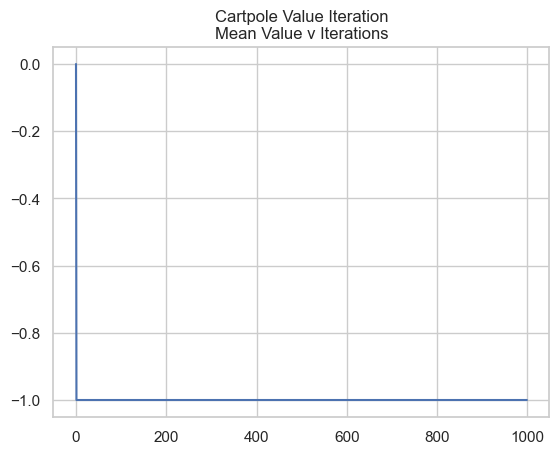

9.5


In [12]:
# run VI
start_time = time.time()
V, V_track, pi = Planner(cartpole.P).value_iteration(gamma = best_params[0], theta = 0 , n_iters = 1000)
print("--- VI took %s seconds ---" % (time.time() - start_time))


#test policy
test_scores = TestEnv.test_env(env=cartpole, n_iters=10, render=False, pi=pi, user_input=False)

max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "Cartpole Value Iteration\nMean Value v Iterations")
print(np.mean(test_scores))




In [3]:
# PI Hyperparameter tuning

cartpole_envs = [
    (10,10,10,0.5,0.1,0.5),
    (20,20,20,0.5,0.1,0.5),
    (10,10,10,0.5,0.05,0.5),
    (20,20,20,0.5,0.05,0.5)
]

best_score = -1
best_env = None
for ce in cartpole_envs:
    cartpole = CartpoleWrapper(env, position_bins=ce[0],velocity_bins=ce[1],         
                                angular_velocity_bins=ce[2],
                                threshold_bins=ce[3],
                                angular_center_resolution=ce[4],
                                angular_outer_resolution=ce[5])
    V, V_track, pi = Planner(cartpole.P).policy_iteration(n_iters = 1000)
    test_scores = TestEnv.test_env(env=cartpole, n_iters=500, render=False, pi=pi, user_input=False)
    max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')

    print("Score: " + str(np.mean(test_scores)) + " on env: " + str(ce))
    if np.mean(test_scores) > best_score:
        best_env = ce
        best_score = np.mean(test_scores)

cartpole = CartpoleWrapper(env, position_bins=best_env[0],velocity_bins=best_env[1],         
                                angular_velocity_bins=best_env[2],
                                threshold_bins=best_env[3],
                                angular_center_resolution=best_env[4],
                                angular_outer_resolution=best_env[5])
print("Best Env: "+ str(best_env))
cartpole_map_size=(best_env[0],best_env[2])

gamma=[.7, .9, .99, 1]
n_iters=[1000]
theta=[1e-1, 1e-3, .1e-5, .1e-8]

# Find best VI hyperparamters 
rewards_and_params_results, highest_avg_reward, best_params = GridSearch.pi_grid_search(cartpole, gamma, n_iters, theta)

print("Best Result: "+ str(highest_avg_reward) + ", achieved with: " +  str(best_params))

Score: 9.348 on env: (10, 10, 10, 0.5, 0.1, 0.5)
Score: 9.326 on env: (20, 20, 20, 0.5, 0.1, 0.5)
Score: 9.344 on env: (10, 10, 10, 0.5, 0.05, 0.5)
Score: 9.358 on env: (20, 20, 20, 0.5, 0.05, 0.5)
Best Env: (20, 20, 20, 0.5, 0.05, 0.5)
running PI with gamma: 0.7  n_iters: 1000  theta: 0.1
Avg. episode reward:  9.45
###################
running PI with gamma: 0.7  n_iters: 1000  theta: 0.001
Avg. episode reward:  9.22
###################
running PI with gamma: 0.7  n_iters: 1000  theta: 1e-06
Avg. episode reward:  9.34
###################
running PI with gamma: 0.7  n_iters: 1000  theta: 1e-09
Avg. episode reward:  9.37
###################
running PI with gamma: 0.9  n_iters: 1000  theta: 0.1
Avg. episode reward:  9.34
###################
running PI with gamma: 0.9  n_iters: 1000  theta: 0.001
Avg. episode reward:  9.37
###################
running PI with gamma: 0.9  n_iters: 1000  theta: 1e-06
Avg. episode reward:  9.34
###################
running PI with gamma: 0.9  n_iters: 1000  the

--- PI took 114.28093957901001 seconds ---
9.6


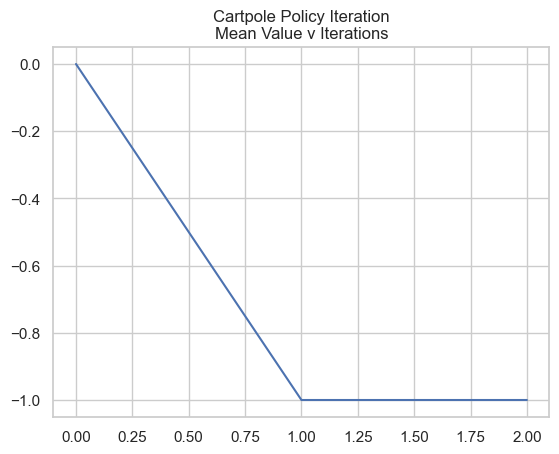

9.6


In [13]:
# run PI
start_time = time.time()
V, V_track, pi = Planner(cartpole.P).policy_iteration(gamma = best_params[0], theta = 0, n_iters = 1000)
print("--- PI took %s seconds ---" % (time.time() - start_time))

#test policy
test_scores = TestEnv.test_env(env=cartpole, n_iters=10, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))

max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "Cartpole Policy Iteration\nMean Value v Iterations")
print(np.mean(test_scores))



In [10]:
# PI Hyperparameter tuning

# First select best environment
cartpole_envs = [
    (10,10,10,0.5,0.1,0.5),
    (20,20,20,0.5,0.1,0.5),
    (10,10,10,0.5,0.05,0.5),
    (20,20,20,0.5,0.05,0.5)
]

best_score = -1
best_env = None
for ce in cartpole_envs:
    cartpole = CartpoleWrapper(env, position_bins=ce[0],velocity_bins=ce[1],         
                                angular_velocity_bins=ce[2],
                                threshold_bins=ce[3],
                                angular_center_resolution=ce[4],
                                angular_outer_resolution=ce[5])

    # Run Sarsa
    Q, V, pi, Q_track, pi_track, rewards = RL(cartpole).sarsa(n_episodes = 1000)

    #test policy
    test_scores = TestEnv.test_env(env=cartpole, n_iters=500, render=False, pi=pi, user_input=False)
    print("Score: " + str(np.mean(test_scores)) + " on env: " + str(ce))
    if np.mean(test_scores) > best_score:
        best_env = ce
        best_score = np.mean(test_scores)

        
cartpole = CartpoleWrapper(env, position_bins=best_env[0],velocity_bins=best_env[1],         
                                angular_velocity_bins=best_env[2],
                                threshold_bins=best_env[3],
                                angular_center_resolution=best_env[4],
                                angular_outer_resolution=best_env[5])
print("Best Env: "+ str(best_env))

# Then Tune paramters for this environment

gamma=[.7, .9, .99, 1]
n_iters=[1000]
epsilon_decay=[.9, .95, .99, 1]
init_alpha = [0.1, 0.5, 0.9]
alpha_decay_ratio = [0.1, 0.5, 0.99]
init_epsilon = [0.2, 0.5, 1]

# Find best Sarasa hyperparamters 
rewards_and_params_results, highest_avg_reward, best_params = GridSearch.sarsa_grid_search(cartpole, gamma, epsilon_decay, n_iters)

best_score = -1
best_add_params = [0,0,0]
for ia in init_alpha:
    for ad in alpha_decay_ratio:
        for ie in init_epsilon:
            # Run Sarsa
            Q, V, pi, Q_track, pi_track, rewards = RL(cartpole).sarsa(gamma = best_params[0],
                                                                       epsilon_decay_ratio = best_params[1],
                                                                      alpha_decay_ratio = ad,
                                                                      init_alpha = ia,
                                                                      init_epsilon = ie,
                                                                      n_episodes = n_iters[0])

            #test policy
            test_scores = TestEnv.test_env(env=cartpole, n_iters=5000, render=False, pi=pi, user_input=False)
            if np.mean(test_scores) > best_score:
                best_score = np.mean(test_scores)
                best_add_params[0] = ia
                best_add_params[1] = ad
                best_add_params[2] = ie

print("Best Result: "+ str(highest_avg_reward) + ", achieved with: " +  str(best_params) + str(best_add_params))

Score: 94.15 on env: (10, 10, 10, 0.5, 0.1, 0.5)


Score: 37.238 on env: (20, 20, 20, 0.5, 0.1, 0.5)


Score: 50.362 on env: (10, 10, 10, 0.5, 0.05, 0.5)


Score: 20.384 on env: (20, 20, 20, 0.5, 0.05, 0.5)
Best Env: (10, 10, 10, 0.5, 0.1, 0.5)
running sarsa with gamma: 0.7 epsilon decay: 0.9  iterations: 1000


Avg. episode reward:  112.02
###################
running sarsa with gamma: 0.7 epsilon decay: 0.95  iterations: 1000


Avg. episode reward:  88.78
###################
running sarsa with gamma: 0.7 epsilon decay: 0.99  iterations: 1000


Avg. episode reward:  51.09
###################
running sarsa with gamma: 0.7 epsilon decay: 1  iterations: 1000


Avg. episode reward:  103.48
###################
running sarsa with gamma: 0.9 epsilon decay: 0.9  iterations: 1000


Avg. episode reward:  40.97
###################
running sarsa with gamma: 0.9 epsilon decay: 0.95  iterations: 1000


Avg. episode reward:  58.2
###################
running sarsa with gamma: 0.9 epsilon decay: 0.99  iterations: 1000


Avg. episode reward:  44.45
###################
running sarsa with gamma: 0.9 epsilon decay: 1  iterations: 1000


Avg. episode reward:  31.6
###################
running sarsa with gamma: 0.99 epsilon decay: 0.9  iterations: 1000


Avg. episode reward:  35.46
###################
running sarsa with gamma: 0.99 epsilon decay: 0.95  iterations: 1000


Avg. episode reward:  40.25
###################
running sarsa with gamma: 0.99 epsilon decay: 0.99  iterations: 1000


Avg. episode reward:  96.3
###################
running sarsa with gamma: 0.99 epsilon decay: 1  iterations: 1000


Avg. episode reward:  86.36
###################
running sarsa with gamma: 1 epsilon decay: 0.9  iterations: 1000


Avg. episode reward:  35.45
###################
running sarsa with gamma: 1 epsilon decay: 0.95  iterations: 1000


Avg. episode reward:  129.77
###################
running sarsa with gamma: 1 epsilon decay: 0.99  iterations: 1000


Avg. episode reward:  66.34
###################
running sarsa with gamma: 1 epsilon decay: 1  iterations: 1000


Avg. episode reward:  68.05
###################


Best Result: 129.77, achieved with: (1, 0.95, 1000)[0.9, 0.99, 1]


--- PI took 10617.008339881897 seconds ---
500.0


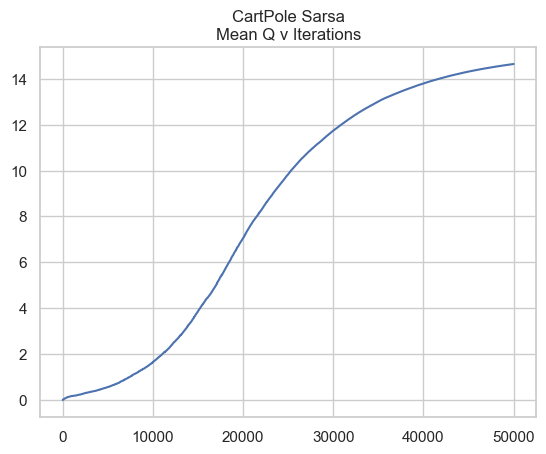

500.0


In [11]:

# Run Sarsa

start_time = time.time()
Q, V, pi, Q_track, pi_track, rewards = RL(cartpole).sarsa(gamma = best_params[0],
                                                           epsilon_decay_ratio = best_params[1],
                                                           alpha_decay_ratio = best_add_params[1],
                                                           init_alpha = best_add_params[0],
                                                           init_epsilon = best_add_params[2],
                                                           n_episodes = 50000)
print("--- PI took %s seconds ---" % (time.time() - start_time))

#test policy
test_scores = TestEnv.test_env(env=cartpole, n_iters=10, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))


max_value_per_iter = np.trim_zeros(np.mean(Q_track, axis=(1,2)), 'b')
Plots.v_iters_plot(max_value_per_iter, "CartPole Sarsa\nMean Q v Iterations")
print(np.mean(test_scores))
